In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/c/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/c/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/c/house-prices-advanced-regression-techniques/test.csv


In [2]:
# LOADING THE DATA
test = pd.read_csv('/kaggle/input/c/house-prices-advanced-regression-techniques/test.csv')
df = pd.read_csv('/kaggle/input/c/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# EXPLORING THE DATA
# A. SHAPE - (1460, 81)
# 1460 ROWS WITH 81 COLUMNS
df.shape

(1460, 81)

In [4]:
# B. INFORMATION ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# C. Displaying the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# D. Finding the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# SECTION 1: EXPLORATION
This section explores about the data. To its most expensive house price to the depths within the data it has.

## SECTION 1.1 EXTREMETIES

This section finds the most expensive, cheapest and average house price.

In [7]:
# MOST EXPENSIVE HOUSE PRICE
most_expensive = df.loc[df['SalePrice'].idxmax()]
most_expensive # WITH AN Id of 692 has the most expensive house price

Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object

In [8]:
most_cheap = df.loc[df['SalePrice'].idxmin()]
most_cheap # WITH AN Id of 496 has the cheapest house price

Id                   496
MSSubClass            30
MSZoning         C (all)
LotFrontage         60.0
LotArea             7879
                  ...   
MoSold                11
YrSold              2009
SaleType              WD
SaleCondition    Abnorml
SalePrice          34900
Name: 495, Length: 81, dtype: object

## Section 1.2 Key Statistics
This section further elaborate key exploration using some statistical methods.

In [9]:
# AVERAGE HOUSE PRICE
average_price = df['SalePrice'].mean()
round(average_price, 2) # THE AVERAGE PRICE IS 180K DOLLARS!

np.float64(180921.2)

In [10]:
#  MEDIAN OF HOUSE PRICE
median_price = df['SalePrice'].median()
median_price

163000.0

In [11]:
# FINDING OUT THE AVERAGE NUMBER OF BEDROOMS PRESENT IN A HOUSE
bedroom = df['BedroomAbvGr'].mean()
round(bedroom) # WITHOUT ROUND IT IS 2.84

3

In [12]:
# FINDING OUT THE AVERAGE GROUND LIVING AREA IN SQUARE FEET
glivarea = df['GrLivArea'].mean()
glivarea # 1515 sq. ft.!!

np.float64(1515.463698630137)

In [13]:
house_price_std = df['SalePrice'].std()
house_price_std

79442.50288288663

In [14]:
# QUANTILE AND INTERQUARTILE RANGE
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# WHISKERS
# LOWER WHISKER
lw_whisker = Q1 - 1.5 * IQR
# HIGHER WHISKER
hg_whisker = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Whisker: {lw_whisker}, \
High Whisker: {hg_whisker}") 
# Q1:129975.0, Q3:214000.0, IQR: 84025.0
# Lower Whisker: 3937.5, High Whisker: 340037.5


Q1: 129975.0, Q3: 214000.0, IQR: 84025.0, Lower Whisker: 3937.5, High Whisker: 340037.5


In [15]:
# GETTING SUMMARY STATISTICS
describe = df.describe()
describe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# SECTION 2: BASIC VISUALIZATION


## SECTION 2.1: HISTOGRAMS

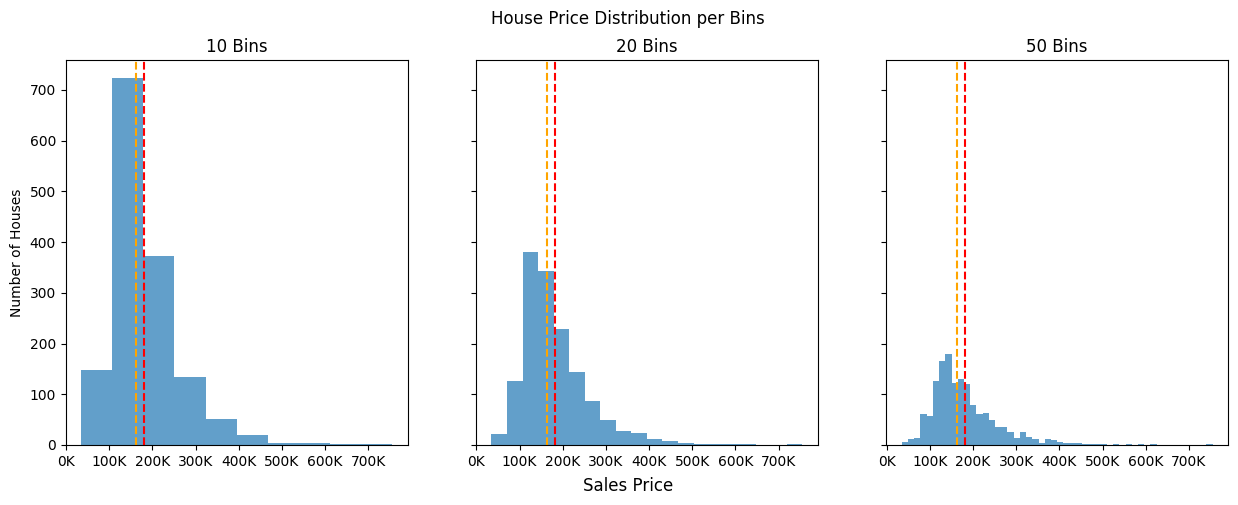

In [16]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex= True, sharey=True)

for a in ax:
    a.xaxis.set_major_locator(MultipleLocator(100_000))
    a.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

axes = ax
num_bins = 10, 20, 50
bin_labels = ['10 Bins', '20 Bins', '50 Bins']

for a, n_bins, b_labels in zip(axes, num_bins, bin_labels):
    a.hist(x=df['SalePrice'], bins = n_bins, label = b_labels, alpha=0.7)
    a.set_title(b_labels)
    a.axvline(average_price, color = 'red', linestyle ='--', label =f"Mean {b_labels}")
    a.axvline(median_price, color = 'orange', linestyle ='--', label =f"Median {b_labels}")


fig.suptitle('House Price Distribution per Bins')
fig.supxlabel('Sales Price')
ax[0].set_ylabel('Number of Houses')
plt.show()

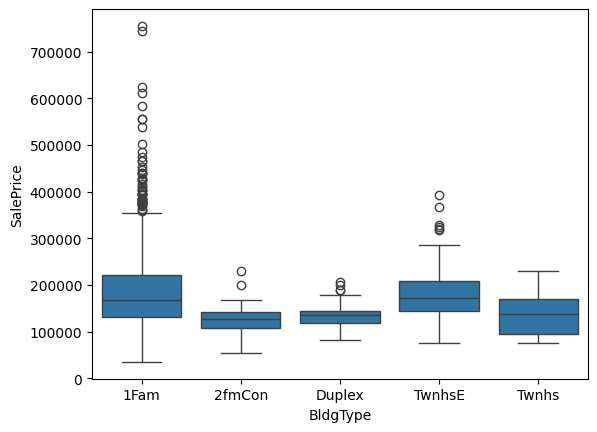

In [17]:
sns.boxplot(x=df['BldgType'],y=df['SalePrice'])
plt.show()

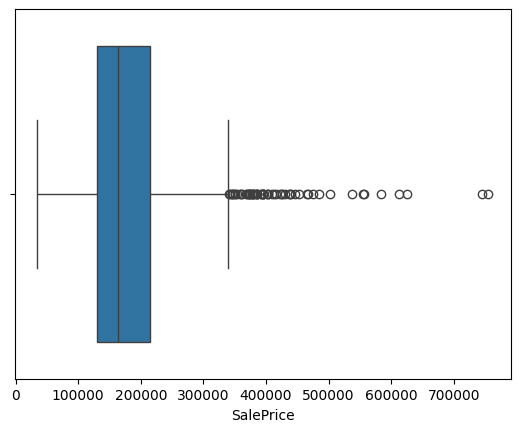

In [18]:
sns.boxplot(x=df['SalePrice'])
plt.show()

# SECTION 3: FINDING RELATIONSHIPS

## SECTION 3.1: DOES SIZE MATTER?

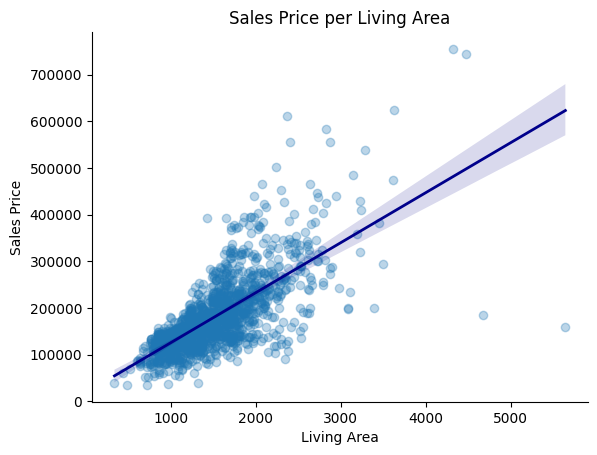

In [19]:
# Task 1: Size vs Price Scatter Plot
sns.regplot(x='GrLivArea', 
            y='SalePrice', 
            data=df,
            scatter_kws={'alpha':0.3},
            line_kws={'color':'darkblue', 'linewidth':2})
plt.title("Sales Price per Living Area")
plt.ylabel("Sales Price")
plt.xlabel("Living Area")
sns.despine()


plt.show()

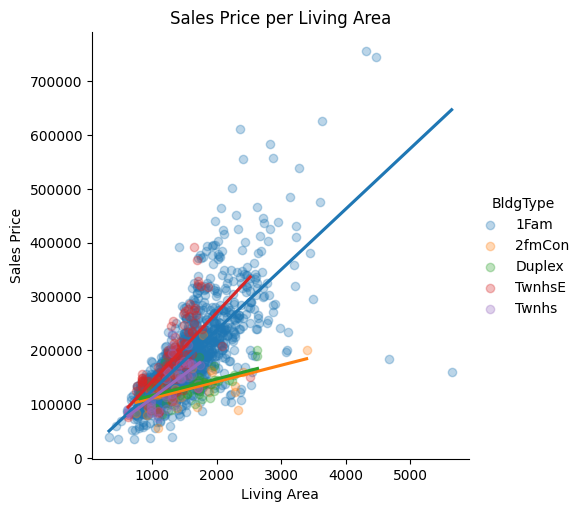

In [20]:
# Task 1: Size vs Price Scatter Plot
sns.lmplot(x='GrLivArea', 
            y='SalePrice', 
            data=df,
            scatter_kws={'alpha':0.3},
            ci=None,
            hue='BldgType')
plt.title("Sales Price per Living Area")
plt.ylabel("Sales Price")
plt.xlabel("Living Area")
sns.despine()


plt.show()

In [21]:
# FINDING THE PRICE PER NEIGHBORHOOD
location_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
location_price

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

In [22]:
location_area = df.groupby('Neighborhood')['GrLivArea'].mean().sort_values()
location_area

Neighborhood
MeadowV    1058.941176
IDOTRR     1142.297297
BrDale     1143.187500
BrkSide    1203.068966
Sawyer     1215.135135
NPkVill    1253.000000
Mitchel    1294.204082
NAmes      1310.311111
Edwards    1340.040000
Blueste    1392.500000
Blmngtn    1427.941176
OldTown    1479.725664
CollgCr    1480.500000
Veenker    1539.636364
SawyerW    1595.016949
Somerst    1596.651163
Gilbert    1641.316456
NWAmes     1727.780822
Timber     1749.368421
ClearCr    1788.107143
Crawfor    1791.607843
SWISU      1801.240000
StoneBr    1879.080000
NridgHt    1915.948052
NoRidge    2508.853659
Name: GrLivArea, dtype: float64

In [23]:
diff_loc_price = location_price.iloc[-1] - location_price.iloc[0]
round(diff_loc_price, 2)

np.float64(236718.85)

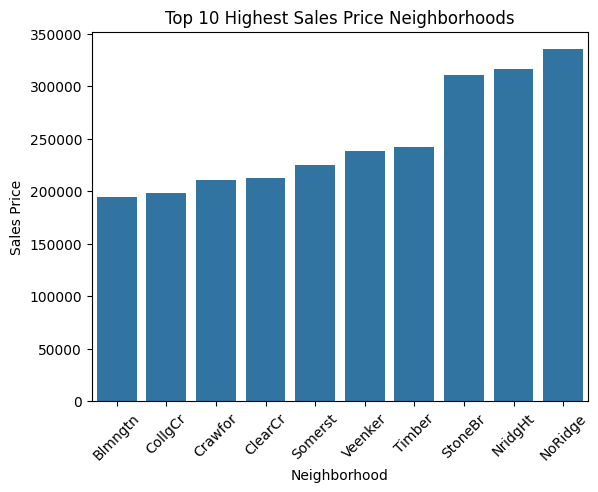

In [24]:
# CREATING A BARCHART FOR THIS
# TOP 10 NEIGHBORHOODS WITH THE HIGHEST AVERAGE SALE PRICE ON HOUSES
sns.barplot(data=location_price.tail(10))
plt.title("Top 10 Highest Sales Price Neighborhoods")
plt.ylabel("Sales Price")
plt.xticks(rotation=45)
plt.show()

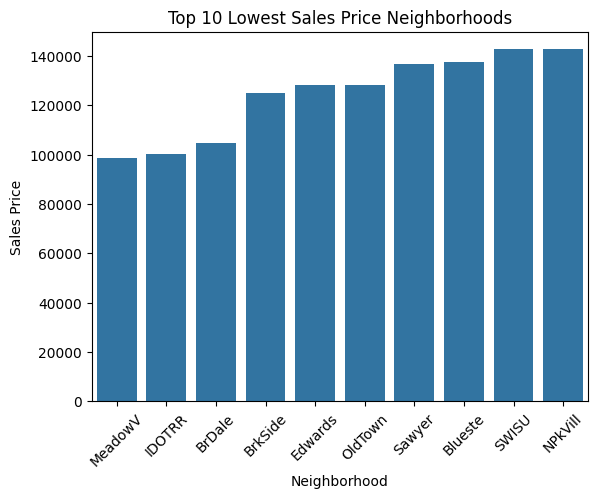

In [25]:
# CREATING A BARCHART FOR THIS
# TOP 10 NEIGHBORHOODS WITH THE LOWEST AVERAGE SALE PRICE ON HOUSES
sns.barplot(data=location_price.head(10))
plt.xticks(rotation=45)
plt.title("Top 10 Lowest Sales Price Neighborhoods")
plt.ylabel('Sales Price')
plt.show()

/tmp/ipykernel_17/2072971547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_price, palette='Blues')


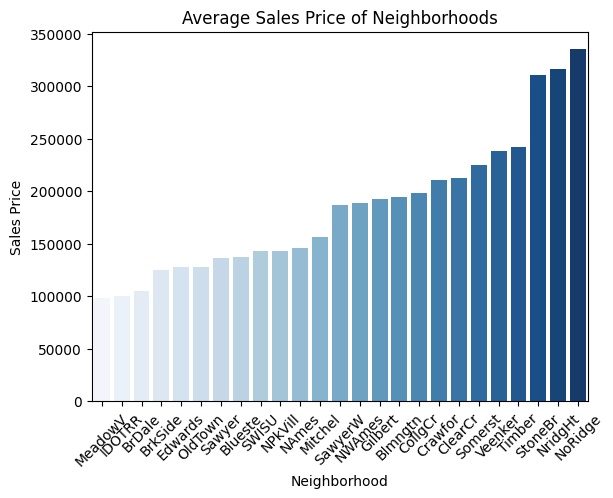

In [26]:
# CREATING A BARCHART FOR THIS
# TOP 10 NEIGHBORHOODS WITH THE LOWEST AVERAGE SALE PRICE ON HOUSES
sns.barplot(data=location_price, palette='Blues')
plt.xticks(rotation=45)
plt.title("Average Sales Price of Neighborhoods")
plt.ylabel('Sales Price')
plt.show()

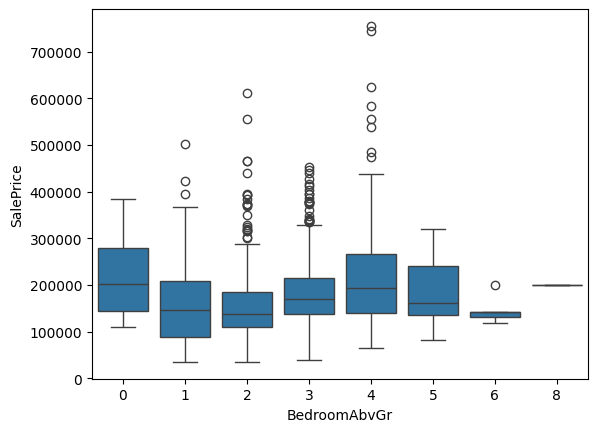

In [27]:
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.show()

In [28]:
bedroom_price_avg = df.groupby('BedroomAbvGr')['SalePrice'].mean()
bedroom_price_avg

BedroomAbvGr
0    221493.166667
1    173162.420000
2    158197.659218
3    181056.870647
4    220421.253521
5    180819.047619
6    143779.000000
8    200000.000000
Name: SalePrice, dtype: float64

In [29]:
diff_3_2_bd = bedroom_price_avg.iloc[3] - bedroom_price_avg.iloc[2]
diff_3_2_bd

np.float64(22859.211428889103)

In [30]:
diff_4_3_bd = bedroom_price_avg.iloc[4] - bedroom_price_avg.iloc[3]
diff_4_3_bd

np.float64(39364.38287436057)

In [31]:
bedroom_0 = df[df['BedroomAbvGr'] == 0]
bedroom_0 = bedroom_0[['BedroomAbvGr', 'BldgType','SalePrice', 'GrLivArea']]
avg_area_bd0 = bedroom_0['GrLivArea'].mean
bedroom_0

,BedroomAbvGr,BldgType,SalePrice,GrLivArea
53,0,1Fam,385000,1842
189,0,TwnhsE,286000,1593
634,0,Duplex,144000,1056
1163,0,Duplex,108959,1258
1213,0,1Fam,145000,960
1270,0,1Fam,260000,1524


In [32]:
bedroom_6 = df[df['BedroomAbvGr'] == 6]
bedroom_6 = bedroom_6[['BedroomAbvGr', 'BldgType','SalePrice', 'GrLivArea']]
bedroom_6

,BedroomAbvGr,BldgType,SalePrice,GrLivArea
144,6,Duplex,125000,1728
291,6,2fmCon,135900,1716
330,6,Duplex,119000,1728
570,6,Duplex,142600,1728
843,6,Duplex,141000,1800
897,6,Duplex,142953,2240
1350,6,Duplex,200000,2634


In [33]:
avg_area_bd0 = bedroom_0['GrLivArea'].mean()
avg_area_bd0

np.float64(1372.1666666666667)

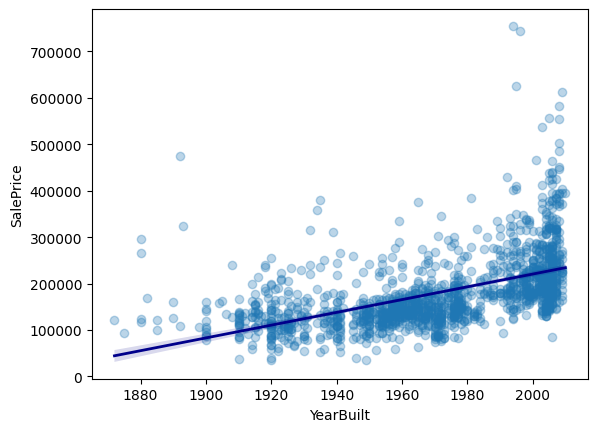

In [34]:
sns.regplot(x='YearBuilt', y='SalePrice', data=df,
           scatter_kws={'alpha':0.3}, line_kws={'color':'darkblue', 'linewidth':2})
plt.show()

In [35]:
min_year_built = df[['YearBuilt']].min()
min_year_built # 1872
max_year_built = df[['YearBuilt']].max()
max_year_built # 2010


YearBuilt    2010
dtype: int64

In [36]:
bins = [1850, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
labels = [
    "1850s",  # 1850–1899
    "1900s",  # 1900–1909
    "1910s",  # 1910–1919
    "1920s",  # 1920–1929
    "1930s",  # 1930–1939
    "1940s",  # 1940–1949
    "1950s",  # 1950–1959
    "1960s",  # 1960–1969
    "1970s",  # 1970–1979
    "1980s",  # 1980–1989
    "1990s",  # 1990–1999
    "2000s",  # 2000–2009
]
df['YearBuiltCategory'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, include_lowest=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuiltCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2000s
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1970s
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2000s
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1910s
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,1990s
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1970s
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1940s
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1940s


In [37]:
avg_price_per_decade = df.groupby('YearBuiltCategory')['SalePrice'].mean()
avg_price_per_decade

/tmp/ipykernel_17/3751468721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_decade = df.groupby('YearBuiltCategory')['SalePrice'].mean()


YearBuiltCategory
1850s    153272.200000
1900s    123900.181818
1910s    128330.450704
1920s    125029.342105
1930s    146699.285714
1940s    126036.246914
1950s    144645.621951
1960s    150601.164835
1970s    156024.005747
1980s    199960.000000
1990s    226501.188571
2000s    244527.458791
Name: SalePrice, dtype: float64

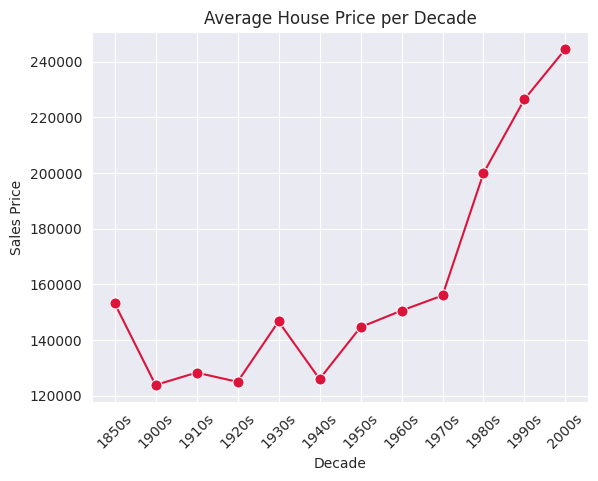

In [38]:
sns.set_style("darkgrid")
sns.lineplot(data=avg_price_per_decade, marker='o', markersize=8, color='crimson')
plt.xticks(rotation=45)
plt.title("Average House Price per Decade")
plt.xlabel("Decade")
plt.ylabel("Sales Price")
plt.show()

In [39]:
df_num = df.select_dtypes(include='number')
df_num.head # THERE ARE 38 numeric FEATURES WITHIN THE DATASET

<bound method NDFrame.head of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0      

In [40]:
# FINDING THE CORRELATION BETWEEN NUMERIC VALUES
correlation = df_num.corr()
salesprice_corr = df_num.corr()['SalePrice'].sort_values()
salesprice_corr
# POSITIVE CORRELATION
# OverallQual      0.790982
# GrLivArea        0.708624

# NEGATIVE CORRELATION
# KitchenAbvGr    -0.135907
# EnclosedPorch   -0.128578

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

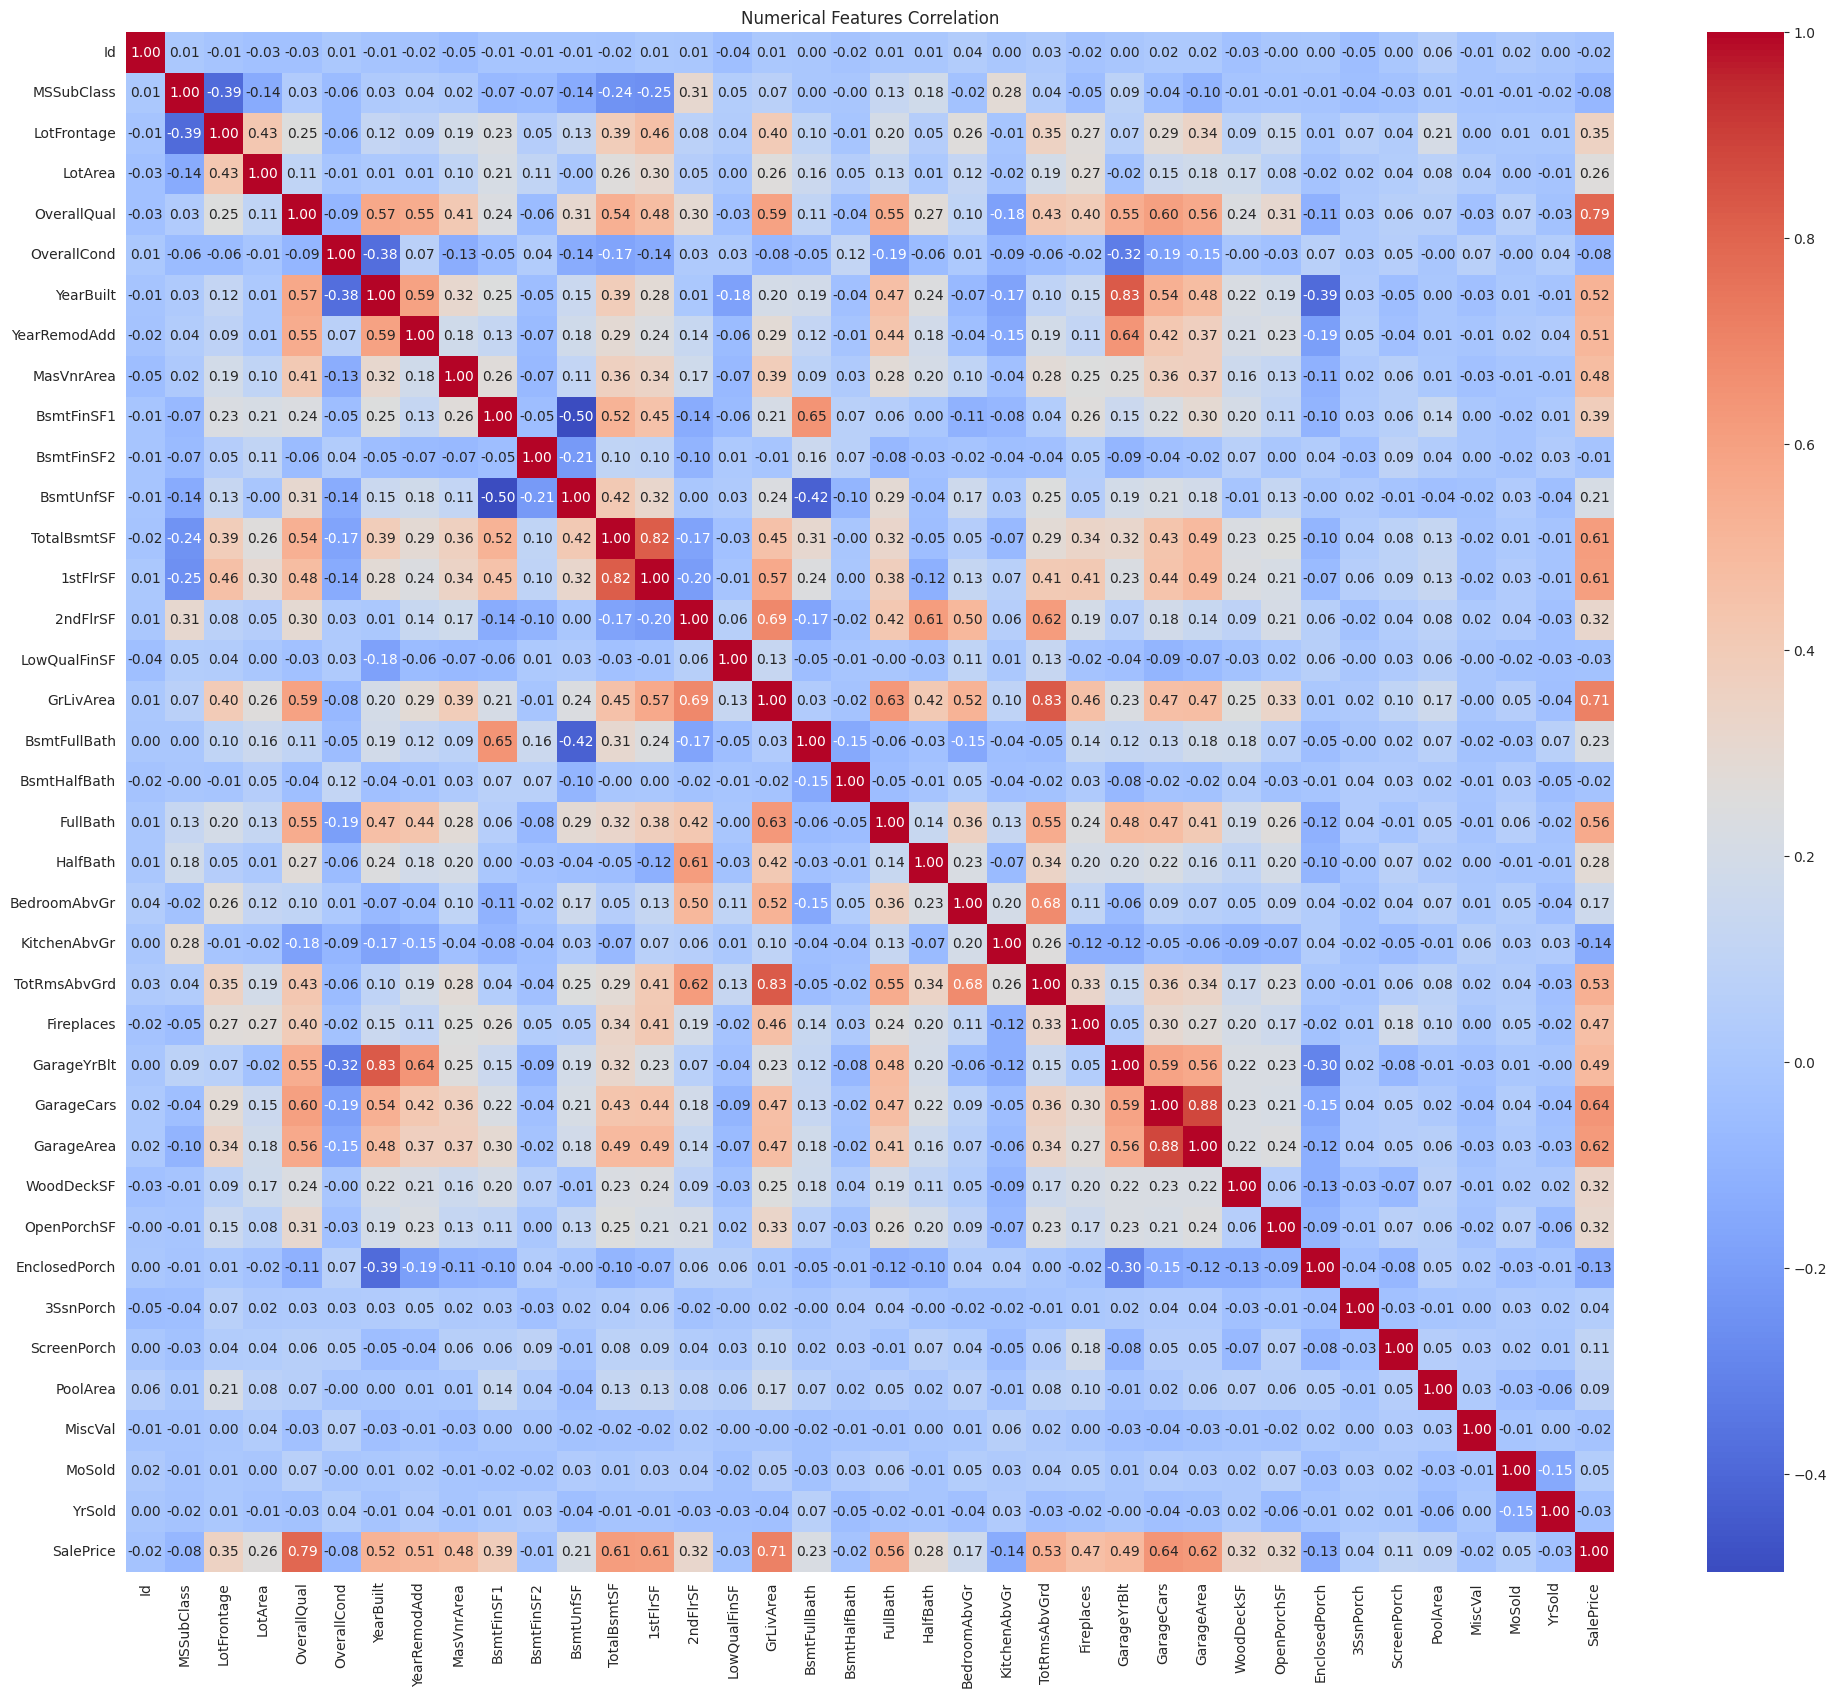

In [41]:
fig3, ax3 = plt.subplots(figsize=(24, 20))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', fmt='.2f', ax=ax3)
ax3.set_title('Numerical Features Correlation')

fig3.savefig("correlation.jpg", dpi=300, bbox_inches='tight')
plt.show()

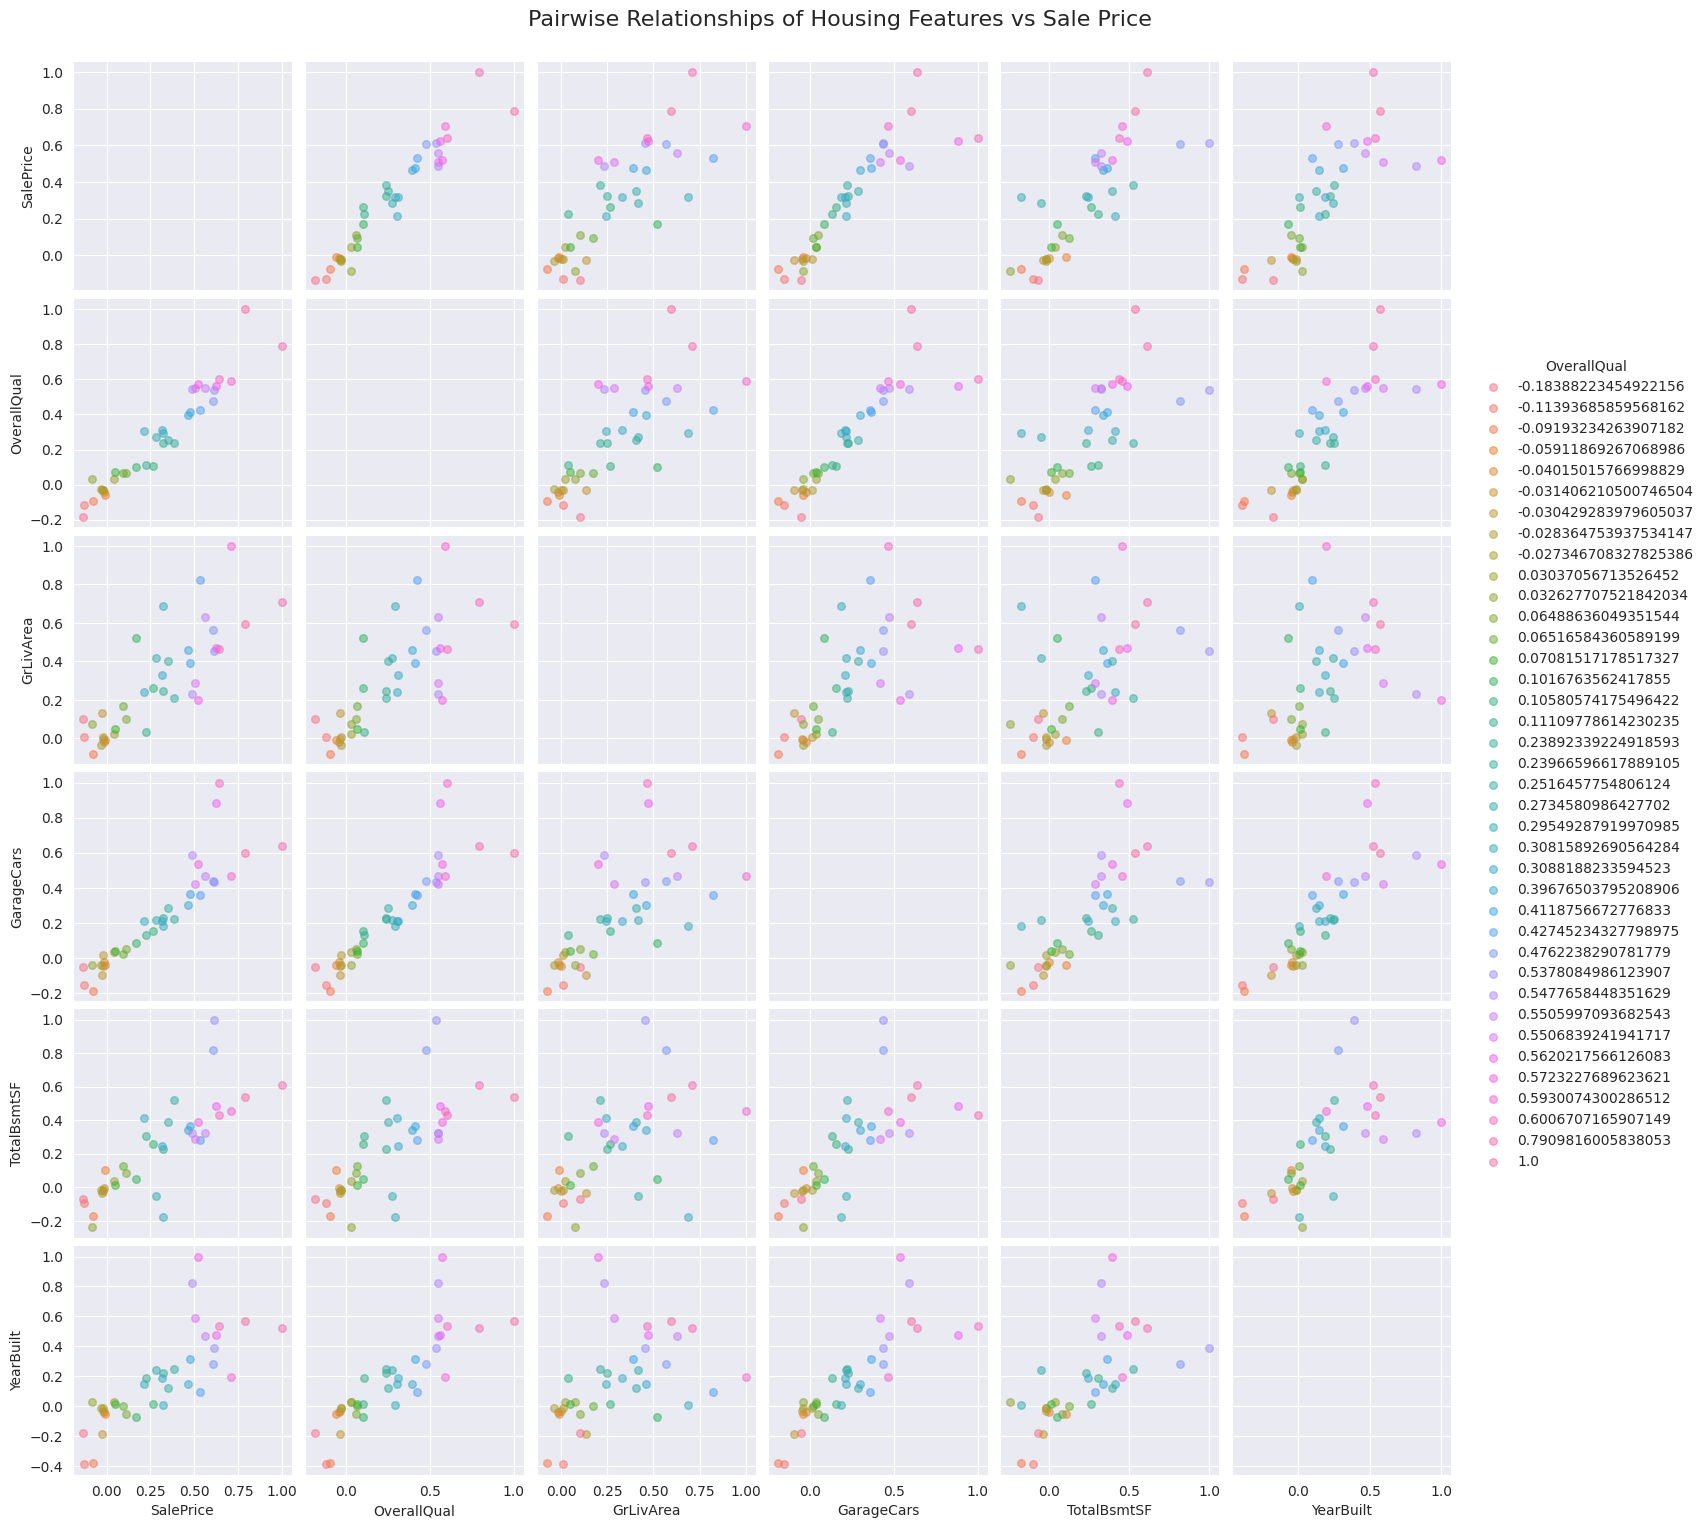

In [42]:
gg = sns.pairplot(data=correlation, vars=['SalePrice',
                                         'OverallQual',
                                         'GrLivArea',
                                         'GarageCars',
                                         'TotalBsmtSF',
                                         'YearBuilt'],
                hue='OverallQual',
                kind = 'reg',
                diag_kind='kde',
                plot_kws={'scatter_kws': {'alpha': 0.5, 's': 30},
                      'line_kws': {'color': 'red', 'linewidth': 8}})
gg.fig.suptitle("Pairwise Relationships of Housing Features vs Sale Price",
    fontsize=16,
    y=1.02)

gg.fig.savefig("pairplot.jpg", dpi=300, bbox_inches='tight')
plt.show()

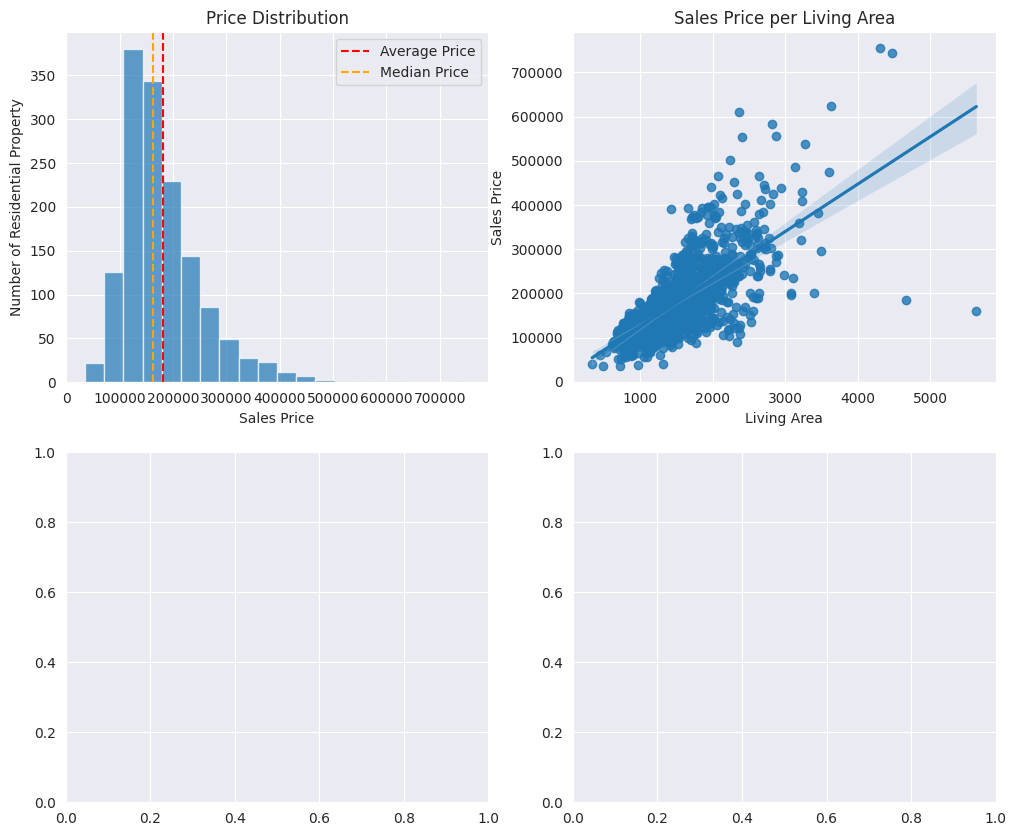

In [43]:
fig5, ax5 = plt.subplots(2,2,figsize=(12, 10))
ax5[0,0].hist(x=df['SalePrice'], bins = 20, alpha=0.7)
ax5[0,0].set_title("Price Distribution", fontsize= 12)
ax5[0,0].axvline(average_price, color = 'red', linestyle ='--', label='Average Price')
ax5[0,0].axvline(median_price, color = 'orange', linestyle ='--', label ='Median Price')
ax5[0,0].set_ylabel('Number of Residential Property')
ax5[0,0].set_xlabel('Sales Price')
ax5[0,0].legend()

sns.regplot(x='GrLivArea', 
            y='SalePrice', 
            data=df,
            ax = ax5[0,1])
ax5[0,1].set_title("Sales Price per Living Area")
ax5[0,1].set_ylabel("Sales Price")
ax5[0,1].set_xlabel("Living Area")

plt.show()